<a href="https://colab.research.google.com/github/Shayankr/Deep_Learning_Project/blob/master/Cat_vs_Dog(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat vs. Dog Classifictaion using CNN

In [1]:
# CNN -- Convolutional Neural Network
# 1.FInding Features
# 2. Regular Classification

In [2]:
# Q.) HOw to find the features of image (OR ROI)?
# 1. Convolution
# 2. Pooling

# you will never Flatten your image in CNN
# directly send 2D image or 3D image

In [3]:
# Formula for output image = (Input - Filter + stride) / (stride)
# or,
# [ (input image shape  -  Filter shape) / (stride) ] + 1
#
# but, if the division is not resulting an integer ,, add a minimum value of padding.
# then formula becomes,
# output image shape = (Input - Filter + Stride + Padding)/(stride)

In [4]:
# Depth - no.of filters used

In [5]:
# Generally, filter size is bigger than strides...so that it becomes overlapped.

In [6]:
!ls root/.kaggle

ls: cannot access 'root/.kaggle': No such file or directory


In [7]:
! mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/

In [8]:
import kaggle

In [9]:
! chmod 600 /root/.kaggle/kaggle.json

In [10]:
!ls /root/.kaggle/

kaggle.json


In [11]:
import os
os.listdir("/root/.kaggle/")

['kaggle.json']

**How to save models??**

In [12]:
# save your content on Google Drive

#with open("SampleText.txt",'w') as _file:
#  _file.write("This is a sample file made on GoogleColab")

#!cp SampleText.text ./drive/MyDrive/

# its saved on Google Drive

## CNN

In [13]:
# Depth -- for multiple features you required multiple filters. Thus,  depth of image increases
# shape(height x width x 3(channels))    ----12 filter applied ----> sahpe(height x weight x 12(no.of filters used))
#
# output = (input - filter + strides + padding(if required)) / (strides)
#
# introducing non-lineraity => ReLU (mostly used), other are also used based on the situation, features
#
# Pooling --. max pooling, sum pooling, average pooling (these 3 are most popular)
# Poling __> selecting best features
#
#SOTA -> State of The Art
# GOAT -> Greatest of all time
#

In [14]:
# chunk --> conv + ReLU + Pooling

**import dataset from kaggle.**

In [15]:
#import dataset from kaggle

! kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:03<00:00, 201MB/s]
100% 812M/812M [00:03<00:00, 230MB/s]


In [16]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [19]:
# test1.zip is for kaggle

In [20]:
# here, I will consider only the train.zip


In [21]:
!unzip -q train.zip

In [22]:
import os

os.mkdir("train1")
os.mkdir("train1/cat")
os.mkdir("train1/dog")

In [23]:
src_folder="train/"
cat_folder = "train1/cat/"
dog_folder = "train1/dog/"

In [24]:
# import shutil

In [25]:
import shutil as sh

In [26]:
for image_name in os.listdir(src_folder):
  if "cat" in image_name:
    sh.copy(src_folder+image_name, cat_folder)
  if "dog" in image_name:
    sh.copy(src_folder+image_name, dog_folder)



In [27]:
# import image-data-generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
from tensorflow.keras.preprocessing.image  import load_img, array_to_img, img_to_array

In [29]:
# Create an instance for ImageDataGenerator
idg = ImageDataGenerator(rotation_range=45, zoom_range=0.2,
                         horizontal_flip= True, rescale=1/255.0,
                         validation_split=0.2)

**subset name: train;expected "training" or "validation"**

In [30]:
train_generator = idg.flow_from_directory(directory="train1", target_size=(150,150),
                                          batch_size=64, subset="training")

Found 20000 images belonging to 2 classes.


In [31]:
val_generator = idg.flow_from_directory(directory="train1", target_size=(150,150),
                                        batch_size=64, subset="validation")

Found 5000 images belonging to 2 classes.


**import all necessary packages**

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from keras.layers import  Flatten, Dense, Conv2D, MaxPooling2D  #in CNN no need of Flatten layer is before the fully connected layer

In [34]:
from keras.activations import relu, softmax

In [35]:
from keras.losses import categorical_crossentropy

In [36]:
from tensorflow.keras.optimizers import SGD

**Build a CNN structure**

In [37]:
from keras import activations
model = Sequential()

#1st chunk
model.add(Conv2D(input_shape=(150,150,3),kernel_size=(3,3), filters=32, strides=(1,1), padding="valid",
                 activation=relu))
# (150-3+1)/1 =(148, 148, 32)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding="valid" ))
#(74,74,32)

#2nd chunk
model.add(Conv2D(kernel_size=(3,3), filters=64, strides=(1,1), padding="valid", 
                 activation=relu))
#(74-3+1)/1 = (72,72,64)
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))
#(36,36,64)


#Now, Flatten the layer 
model.add(Flatten())
#36*36*64

#add dense layer
model.add(Dense(512, activation=relu, ))
model.add(Dense(64, activation=relu))

# add last output layer
model.add(Dense(2, activation=softmax))  #gives 2 outputs

# see model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 512)               4

In [38]:
17*17*128

36992

In [39]:
36*36*64, 150*150*3

(82944, 67500)

In [40]:
model.compile(optimizer=SGD(learning_rate=0.01, ), metrics=["acc"], loss=categorical_crossentropy)

In [41]:
model.fit(train_generator, epochs=20, validation_data=val_generator)  # Check GPU Enabled or not?

Epoch 1/20
313/313 [==============================] - 216s 658ms/step - loss: 0.6808 - acc: 0.5602 - val_loss: 0.6700 - val_acc: 0.5882
Epoch 2/20
313/313 [==============================] - 204s 654ms/step - loss: 0.6613 - acc: 0.5972 - val_loss: 0.6461 - val_acc: 0.6278
Epoch 3/20
313/313 [==============================] - 205s 655ms/step - loss: 0.6477 - acc: 0.6197 - val_loss: 0.6397 - val_acc: 0.6188
Epoch 4/20
313/313 [==============================] - 205s 655ms/step - loss: 0.6361 - acc: 0.6330 - val_loss: 0.6234 - val_acc: 0.6432
Epoch 5/20
313/313 [==============================] - 204s 652ms/step - loss: 0.6213 - acc: 0.6474 - val_loss: 0.6109 - val_acc: 0.6618
Epoch 6/20
313/313 [==============================] - 204s 652ms/step - loss: 0.6094 - acc: 0.6622 - val_loss: 0.5982 - val_acc: 0.6750
Epoch 7/20
313/313 [==============================] - 204s 652ms/step - loss: 0.5966 - acc: 0.6773 - val_loss: 0.6014 - val_acc: 0.6674
Epoch 8/20
313/313 [============================

**BUild another model named "model1" with 3 conv layer**.

In [43]:
from keras import activations
model1 = Sequential()

#1st chunk
model1.add(Conv2D(input_shape=(150,150,3),kernel_size=(3,3), filters=32, strides=(1,1), padding="valid",
                 activation=relu))
# (150-3+1)/1 =(148, 148, 32)
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2),padding="valid" ))
#(74,74,32)

#2nd chunk
model1.add(Conv2D(kernel_size=(3,3), filters=64, strides=(1,1), padding="valid", 
                 activation=relu))
#(74-3+1)/1 = (72,72,64)
model1.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding="valid"))
#(36,36,64)

#add 3rd chunk
model1.add(Conv2D(kernel_size=(3,3), filters=128, strides=(1,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))


#Now, Flatten the layer 
model1.add(Flatten())
#36*36*64

#add dense layer
model1.add(Dense(512, activation=relu, ))
model1.add(Dense(64, activation=relu))

# add last output layer
model1.add(Dense(2, activation=softmax))  #gives 2 outputs

# see model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [47]:
model1.compile(optimizer=SGD(learning_rate=0.01, ), metrics=["acc"], loss=categorical_crossentropy)

In [48]:
model1_history= model1.fit(train_generator, epochs=20, validation_data=val_generator)

Epoch 1/20
313/313 [==============================] - 209s 665ms/step - loss: 0.6787 - acc: 0.5695 - val_loss: 0.6611 - val_acc: 0.6276
Epoch 2/20
313/313 [==============================] - 205s 655ms/step - loss: 0.6562 - acc: 0.6151 - val_loss: 0.6682 - val_acc: 0.5798
Epoch 3/20
313/313 [==============================] - 204s 653ms/step - loss: 0.6400 - acc: 0.6338 - val_loss: 0.6184 - val_acc: 0.6670
Epoch 4/20
313/313 [==============================] - 205s 654ms/step - loss: 0.6173 - acc: 0.6577 - val_loss: 0.5974 - val_acc: 0.6818
Epoch 5/20
313/313 [==============================] - 203s 650ms/step - loss: 0.6011 - acc: 0.6729 - val_loss: 0.5805 - val_acc: 0.6946
Epoch 6/20
313/313 [==============================] - 205s 654ms/step - loss: 0.5850 - acc: 0.6895 - val_loss: 0.5679 - val_acc: 0.7034
Epoch 7/20
313/313 [==============================] - 204s 652ms/step - loss: 0.5734 - acc: 0.7012 - val_loss: 0.5534 - val_acc: 0.7166
Epoch 8/20
313/313 [============================

**Save the model--**

In [49]:
model1.save(filepath="Cat_vs_Dog_CNN_19032022")

INFO:tensorflow:Assets written to: Cat_vs_Dog_CNN_19032022/assets


In [50]:
#class-mode
train_generator.class_mode

'categorical'

In [51]:
# check the indices of class
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [52]:
val_generator.class_indices

{'cat': 0, 'dog': 1}

**{"cat" :0  and "dog" : 1}**

**Load back the model into this notebook to run the model**

In [53]:
#import load_model

from tensorflow.keras.models import load_model

In [54]:
model1_ = load_model(filepath="Cat_vs_Dog_CNN_19032022")

In [55]:
#view summary of loaded model "model1_"
model1_.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

 How to download this model

To download --> at first make the zip File

In [56]:
# How to download this model

# To download --> at first make the zip File

In [58]:
!zip -r model1.zip Cat_vs_Dog_CNN_19032022

  adding: Cat_vs_Dog_CNN_19032022/ (stored 0%)
  adding: Cat_vs_Dog_CNN_19032022/saved_model.pb (deflated 89%)
  adding: Cat_vs_Dog_CNN_19032022/keras_metadata.pb (deflated 92%)
  adding: Cat_vs_Dog_CNN_19032022/variables/ (stored 0%)
  adding: Cat_vs_Dog_CNN_19032022/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: Cat_vs_Dog_CNN_19032022/variables/variables.index (deflated 57%)
  adding: Cat_vs_Dog_CNN_19032022/assets/ (stored 0%)


In [59]:
# RIght Click on the zipped file to download

In [60]:
# You can also save it in Google Drive

**Check Model history (model1_.history)**

In [61]:
model1_history

In [62]:
model1_history.model

In [64]:
model1_history.params

{'epochs': 20, 'steps': 313, 'verbose': 1}

In [65]:
model1_history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

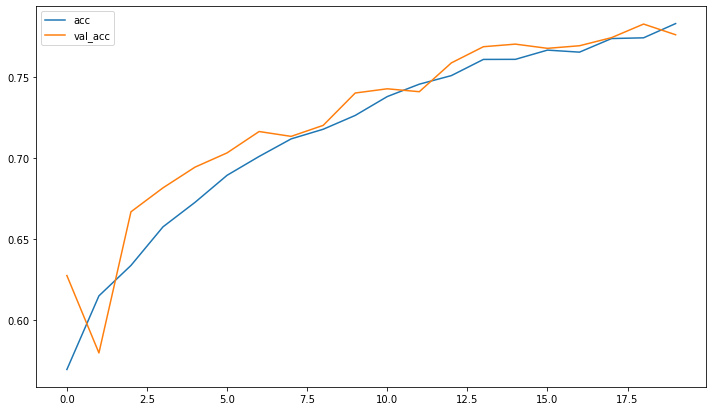

In [66]:
#plot

plt.figure(figsize=(12,7))
plt.plot(model1_history.history.get("acc"), label="acc")
plt.plot(model1_history.history.get("val_acc"), label="val_acc")
plt.legend()
plt.show()

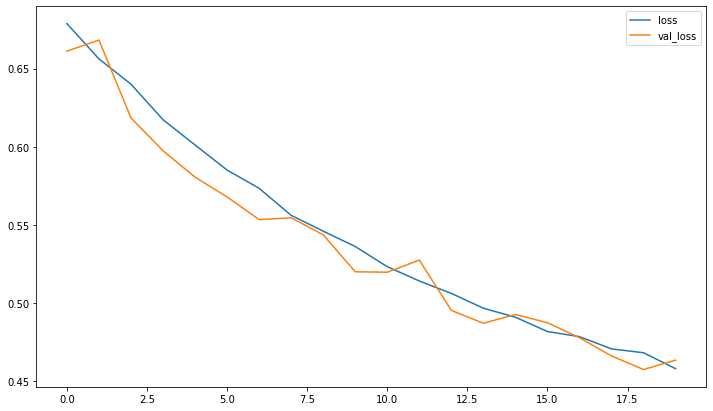

In [67]:
#plot loss

plt.figure(figsize=(12,7))
plt.plot(model1_history.history.get("loss"), label="loss")
plt.plot(model1_history.history.get("val_loss"), label="val_loss")
plt.legend()
plt.show()

In [68]:
#END